In [1]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 33.2 MB/s eta 0:00:00


In [2]:
import sys
import os

def is_colab_env():
    return "google.colab" in sys.modules

def mount_google_drive(drive_dir="/content/drive/", repo_dir="MyDrive/repositories/deepfake-detection"):
    # mount google drive
    from google.colab import drive
    drive.mount(drive_dir)

    # change to correct working directory
    import os
    repo_dir = f"{drive_dir}{repo_dir}"
    os.chdir(repo_dir)
    print(os.listdir()) # verify content
    return repo_dir

def resolve_path(levels_deep=3):
    if is_colab_env():
        return mount_google_drive()
    else:
        # Get the directory of the current script
        current_dir = os.path.dirname(os.path.abspath('__file__'))

        # Construct the path to the parent directory
        for i in range(levels_deep):
            current_dir = os.path.dirname(current_dir)

        # Add the parent directory to sys.path
        sys.path.append(current_dir)
        print(sys.path)
        return current_dir

proj_dir = resolve_path(2)

Mounted at /content/drive/
['src', '.git', 'playground', 'setup', 'README.md', 'environment.yml', 'environment-updated.yml', 'hf_wdf.sh', 'run_jupyter.sh', '.gitignore', 'freqnet_image.ipynb', 'config.py', 'reports', '__pycache__', 'faceforensics_download.py']


In [3]:
# import local config
import config

In [4]:
# from src.adapters.datasets.wilddeepfake import load_streaming_dataset
from datasets import load_dataset

In [5]:
dataset = load_dataset("OpenRL/DeepFakeFace", streaming=True, split="train")

README.md: 0.00B [00:00, ?B/s]

In [9]:
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')


In [11]:
import numpy as np

In [35]:
count = 0
images = []
for d in dataset:
  count+=1
  if count <= 4: continue
  print(d)
  numpy_image_rgb = np.array(d["image"])

  # Convert the RGB NumPy array to BGR for OpenCV
  opencv_image_bgr = cv2.cvtColor(numpy_image_rgb, cv2.COLOR_RGB2BGR)
  images.append(opencv_image_bgr)
  # print("CV2", opencv_image_bgr)
  if count >= 15:
    break
  try:
    faces = face_cascade.detectMultiScale(opencv_image_bgr, 1.1, 4)
    print("Faces found:", len(faces))
  except Exception as e:
    print(e)
    continue



{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x791D318800E0>}
OpenCV(4.12.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x791D2EEBEED0>}
OpenCV(4.12.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x791D31882150>}
OpenCV(4.12.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x791D2EF2FEF0>}
OpenCV(4.12.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

{'image': <PIL.JpegImagePlugin.JpegImageFile image m

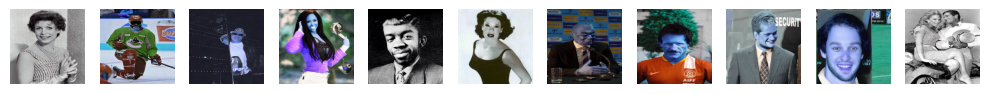

In [36]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(images), figsize=(10, 8))
for i, image in enumerate(images):
  axs[i].imshow(image)

for ax in axs.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()